<a href="https://colab.research.google.com/github/jphil-16/2020_National_Park_Visitation/blob/main/Capstone_1_official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**
Has the COVID-19 pandemic caused a significant difference in the visitation rates for national parks in the United States? Some people have suggested that the pandemic has caused many people to flock to our outdoor spaces and public lands as the only source of refuge during lockdowns; others have pointed out that international visitors have been unable to come to the parks due to travel restrictions and many of the parks have remained closed or re-opened with limited access. It is possible that these effects have canceled each other out or been nonexistent in the first place, in either case leading to steady visitation rates.

The leaders of the National Park Service need to understand how the public is using these spaces so they can ensure that they are staffing the parks at approriate levels. Especially since the parks are a public commodity and the park rangers are meant to help the guests, it would be very bad for the parks to either be overstaffed or understaffed.

# **2. Hypothesis**
Ho: There is no significant difference in the United States National Park visitation rates between February, April, and August.

Ha: There is a significant difference in the United States National Park visitation rates between February, April, and August.


# **3. Data**
The National Parks Service collects data about the number of visitors who come to each park throughout the year. They have provided this data for 2020 broken down by month while providing a comparison to the data from the same month in 2019, along with Year-To-Date data in each case. This research will focus on three particular months from 2020 and how they compare to each other: February, April, and August. These three months represent three distinct periods of time during the year: before COVID-19 shutdowns (February), early/peak shutdowns (April) and summertime phased re-opening (August). By comparing the data from these months to the 2019 data, the results will be able to control for seasonal effects and isolate the effects of the pandemic on National Park visitation.

One interesting observation in the data is that a large number of parks have certain months where the number of 2019 visitors is exactly the same as the number of 2020 visitors. Since these parks have tens of thousands of visitors per month, it is very unlinkely that they would have an exact match. One possible explanation is that the 2020 data was unavailable, so the park copied over the 2019 data as an approximation. Even without these data points, the sample size is plenty large enough, so this research simply eliminated those cases from the data sets.

In [ ]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the april dataset
data_april = pd.read_csv('https://raw.githubusercontent.com/jphil-16/Thinkful_Projects_JDP/main/NPS_Report_APRIL2020.csv').dropna()

# Turn the 'DIFF' column from a string into a number
data_april['DIFF'] = (pd.to_numeric(data_april['DIFF'].str.replace(',',''), errors='coerce'))

# Remove the rows where the 2020 data exactly matches the 2019 data
data_april = data_april[data_april['DIFF'] != 0]

# Take a quick look at the resulting dataframe
data_april.info()
data_april.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 371
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Park      330 non-null    object
 1   Apr-19    330 non-null    object
 2   Apr-20    330 non-null    object
 3   DIFF      330 non-null    int64 
 4   YTD 2019  330 non-null    object
 5   YTD 2020  330 non-null    object
 6   DIFF.1    330 non-null    object
dtypes: int64(1), object(6)
memory usage: 20.6+ KB


,Park,Apr-19,Apr-20,DIFF,YTD 2019,YTD 2020,DIFF.1
0,Abraham Lincoln Birthplace NHP,"16,496","15,092",-1404,"39,535","42,021","2,486"
1,Acadia NP,"68,046","55,713",-12333,"105,893","110,351","4,458"
2,Adams NHP,537,"1,127",590,996,"2,345","1,349"
3,African Burial Ground NM,"5,022",0,-5022,"8,084","6,900","-1,184"
4,Agate Fossil Beds NM,391,129,-262,886,606,-280


In [ ]:
# Load the august dataset and perform data cleanup as above
data_august = pd.read_csv('https://raw.githubusercontent.com/jphil-16/Thinkful_Projects_JDP/main/NPS_Report_AUGUST2020.csv').dropna()
data_august['DIFF'] = (pd.to_numeric(data_august['DIFF'].str.replace(',',''), errors='coerce'))
data_august = data_august[data_august['DIFF'] != 0]

# Take a quick look at the resulting dataframe
data_august.info()
data_august.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 377
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Park      330 non-null    object
 1   AUG 2019  330 non-null    object
 2   AUG 2020  330 non-null    object
 3   DIFF      330 non-null    int64 
 4   YTD 2019  330 non-null    object
 5   YTD 2020  330 non-null    object
 6   DIFF.1    330 non-null    object
dtypes: int64(1), object(6)
memory usage: 20.6+ KB


,Park,AUG 2019,AUG 2020,DIFF,YTD 2019,YTD 2020,DIFF.1
0,Abraham Lincoln Birthplace NHP,"34,816","31,290",-3526,"163,185","160,773","-2,412"
1,Acadia NP,"759,735","681,746",-77989,"2,338,943","1,590,344","-748,599"
2,Adams NHP,"26,011",520,-25491,"139,490","4,827","-134,663"
3,African Burial Ground NM,"4,332",0,-4332,"28,039","6,900","-21,139"
4,Agate Fossil Beds NM,"2,775","1,686",-1089,"13,347","5,813","-7,534"


In [ ]:
# Load the february dataset and perform data cleanup as above
data_february = pd.read_csv('https://raw.githubusercontent.com/jphil-16/Thinkful_Projects_JDP/main/NPS_Report_FEBRUARY2020.csv').dropna()
data_february['DIFF'] = (pd.to_numeric(data_february['DIFF'].str.replace(',',''), errors='coerce'))
data_february = data_february[data_february['DIFF'] != 0]

# Take a quick look at the resulting dataframe
data_february.info()
data_february.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 370
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Park      349 non-null    object
 1   FEB 2019  349 non-null    object
 2   FEB 2020  349 non-null    object
 3   DIFF      349 non-null    int64 
 4   YTD 2019  349 non-null    object
 5   YTD 2020  349 non-null    object
 6   DIFF.1    349 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.8+ KB


,Park,FEB 2019,FEB 2020,DIFF,YTD 2019,YTD 2020,DIFF.1
0,Abraham Lincoln Birthplace NHP,"6,534","7,406",872,"8,473","14,317","5,844"
1,Acadia NP,"9,154","13,459",4305,"17,686","26,099","8,413"
2,Adams NHP,179,320,141,206,620,414
3,African Burial Ground NM,"1,571","1,994",423,"1,667","6,273","4,606"
4,Agate Fossil Beds NM,94,194,100,94,301,207


# **4. Methods**
For this analysis, the data is already split up into three separate groups, and the variable of interest is already calculated. Since the sample size for each group is large enough (n = 330) the next step will be to check for normality. I will start by looking at a histogram.

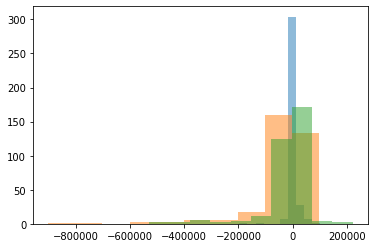

In [ ]:
# Plot Histograms of each month to check for normality
plt.hist(data_february['DIFF'], alpha = .5)
plt.hist(data_april['DIFF'], alpha = .5)
plt.hist(data_august['DIFF'], alpha = .5)
plt.show()

The histograms show that each group is heavily skewed. This makes sense as most parks have very little difference between their 2019 and 2020 visitation rates, but a few parks (though not an insignificant amount) had a much more extreme difference.

In any case, I cannot proceed with a parametric test. Instead, I will use the Kruskal-Willis test to compare the three groups.

In [ ]:
# Run the Kruskal-Wallis Test to handle the non-normal distribution
print(stats.kruskal(data_february['DIFF'], data_april['DIFF'], data_august['DIFF']))

KruskalResult(statistic=302.09186657889677, pvalue=2.521068572013671e-66)


The results appear to be significant, so I will now break the test down into 3 sets of 2. This way the results will be more specific and we can determine if all 3 groups are different or if only 1 group is driving the results

In [ ]:
# Run the test in sets of 2 to get more granular results
print(stats.kruskal(data_february['DIFF'], data_april['DIFF']))
print(stats.kruskal(data_february['DIFF'], data_august['DIFF']))
print(stats.kruskal(data_april['DIFF'], data_august['DIFF']))

KruskalResult(statistic=284.17249221181487, pvalue=9.254678682280302e-64)
KruskalResult(statistic=148.37832318040032, pvalue=3.921318754893491e-34)
KruskalResult(statistic=16.703987348939904, pvalue=4.368907670524964e-05)


These results give a more more complete picture about the differences between each particular group. In order to truly understand where each group is centered, let's look at the mean of each group to see whether the 2020 visitation rates were going up or down. This will provide context to the results of our Kruskal-Willis test.

In [ ]:
# Comparing the average change in visitation rate for each month
# While the above results tell us the months were different, we still need to know how they were different
print('The average change in February visitors was {} from 2019 to 2020'.format(round(data_february['DIFF'].median(),1)))
print('The average change in April visitors was {} from 2019 to 2020'.format(round(data_april['DIFF'].median(),1)))
print('The average change in August visitors was {} from 2019 to 2020'.format(round(data_august['DIFF'].median(),1)))

The average change in February visitors was 605.0 from 2019 to 2020
The average change in April visitors was -6842.5 from 2019 to 2020
The average change in August visitors was -3095.0 from 2019 to 2020


# **5. Results**
Looking at the results of the Kruskal-Wallis test, we can conclude that visitation rates in the National Parks had a statistically significant difference between February, April, and August. In February, the parks had a slightly higher number of visitors compared to 2019. In April, the numbers dropped off dramatically as everyone stayed indoors at the onset of the pandemic in the United States. By August, things were opening back up, but visitation rates were still very far below the 2019 levels.

# **6. Discussion and Recommendation**
Based on these results, we can conclude that the National Parks have seen similar behavior when compared to other types of destinations in the United States. COVID-19 has made a significant impact on the amount of people visiting the parks this year, and while the most drastic differences were back in spring, there was still a very real lingering effect as summer progressed and the COVID impact did not disappear.

This is very good information for the people in charge of the National Parks. They can take these results and staff the parks to match these visitation rates, knowing that the number of guests is less than normal, but there are still enough guests to warrant the majority of the staff sticking around.

To continue this research and provide even better results, my next steps would be to analyze the complete 2020 data instead of focusing on these 3 particular months. I would also like to break down the analysis by park size, since a very large park like Yellowstone might be seeing a different effect compared to a park that usually only sees a few hundred guests during a normal month.

Other lurking variables that could be introducing bias are the overall weather for the year (maybe 2020 has had a lot of bad weather that would have kept people inside anyways) or even the specific states that the parks are in (the general public in Wyoming might be behaving differently compared to the general public in California).